# Instructions
In this lesson, you have worked with some visualization techniques to get a grasp on plotting your data in preparation for clustering it. Scatterplots, in particular are useful for finding groups of objects. Research different ways and different libraries to create scatterplots and document your work in a notebook. You can use the data from this lesson, other lessons, or data you source yourself (please credit its source, however, in your notebook). Plot some data using scatterplots and explain what you discover

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
df = pd.read_csv('nigerian-songs.csv')
df

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [10]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

Text(0.5, 1.0, 'Top genres')

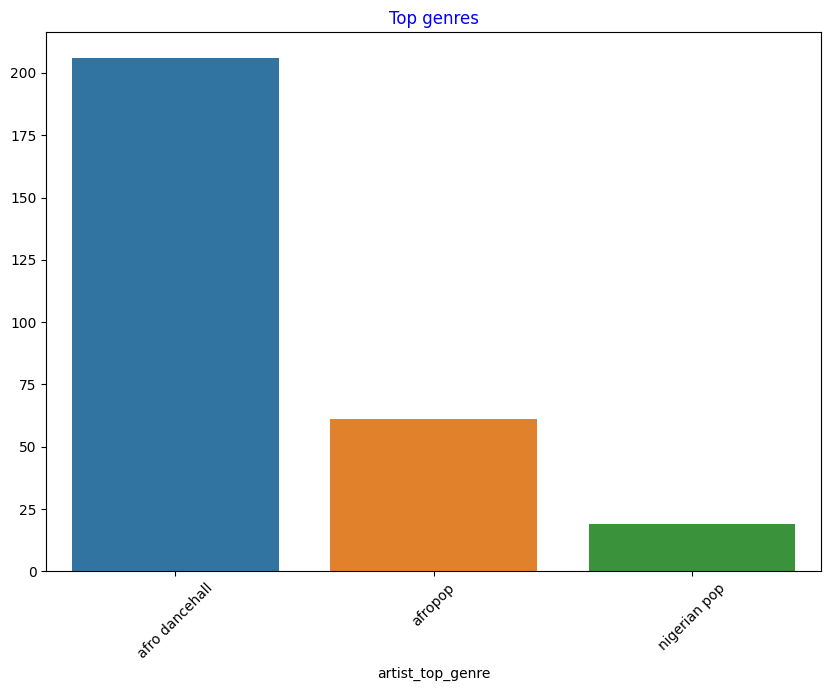

In [11]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

# Mean-Shift clustering algorithm
This is another algorithm that is particularly useful for handling images and computer vision processing.

Mean-shift is similar to the BIRCH algorithm because it also finds clusters without an initial number of clusters being set.

This is a hierarchical clustering algorithm, but the downside is that it doesn't scale well when working with large data sets.

It works by iterating over all of the data points and shifts them towards the mode. The mode in this context is the high density area of data points in a region.

That's why you might hear this algorithm referred to as the mode-seeking algorithm. It will go through this iterative process with each data point and move them closer to where other data points are until all data points have been assigned to a cluster.

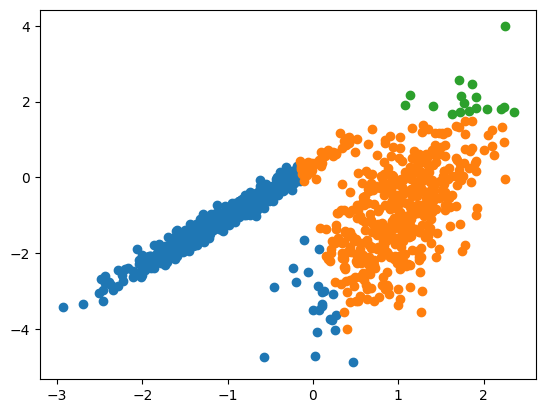

In [17]:
# Implementation:

from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
mean_model = MeanShift()

# assign each data point to a cluster
mean_result = mean_model.fit_predict(training_data)

# get all of the unique clusters
mean_clusters = unique(mean_result)

# plot Mean-Shift the clusters
for mean_cluster in mean_clusters:
    # get data points that fall in this cluster
    index = where(mean_result == mean_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the Mean-Shift plot
pyplot.show()

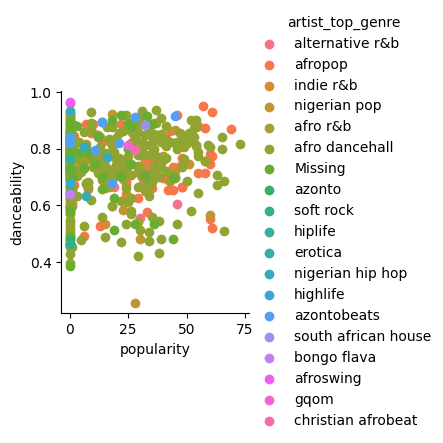

In [18]:
# creating a scatter plot: could not add the size parameter
sns.FacetGrid(df,hue='artist_top_genre') \
    .map(plt.scatter,'popularity','danceability') \
    .add_legend()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.loc[:,('artist_top_genre','popularity','danceability','acousticness','loudness','energy')
           ]
y =df['artist_top_genre']
X['artist_top_genre']= le.fit_transform(X['artist_top_genre'])
y = le.transform(y)

In [20]:
print(X)

     artist_top_genre  popularity  danceability  acousticness  loudness   
0                   5          48         0.666        0.8510    -6.699  \
1                   3          30         0.710        0.0822    -5.640   
2                  14          40         0.836        0.2720    -7.127   
3                  16          14         0.894        0.7980    -4.961   
4                   3          25         0.702        0.1160    -6.044   
..                ...         ...           ...           ...       ...   
525                 1          10         0.735        0.6320    -2.582   
526                 1           0         0.602        0.1770    -6.183   
527                 1           0         0.729        0.2380    -3.942   
528                 1           0         0.809        0.0490    -6.547   
529                 1           0         0.816        0.1140    -2.204   

     energy  
0     0.420  
1     0.683  
2     0.564  
3     0.611  
4     0.833  
..      ...  
5

In [23]:
from sklearn.metrics import silhouette_score

# define the model
mean_model = MeanShift()

# assign each data point to a cluster
mean_result = mean_model.fit_predict(X)

#dbscan = DBSCAN(eps=5, min_samples=5)
#cluster_labels = dbscan.fit_predict(X)

silhouette_avg = silhouette_score(X, mean_result)
print("Silhouette Score:", silhouette_avg)



Silhouette Score: 0.3994440156335263


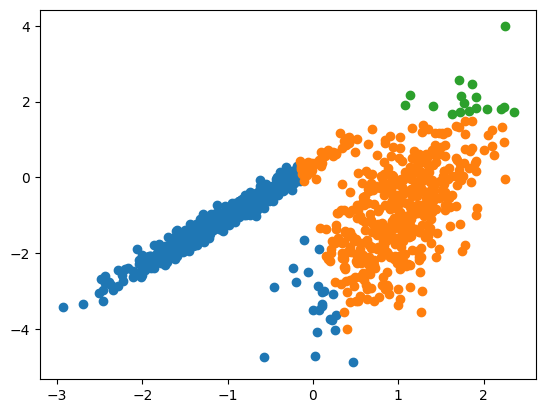

In [22]:
from sklearn.metrics import silhouette_score
# initialize the data set we'll work with
X, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
mean_model = MeanShift()

# assign each data point to a cluster
mean_result = mean_model.fit_predict(X)

# get all of the unique clusters
mean_clusters = unique(mean_result)

# plot Mean-Shift the clusters
for mean_cluster in mean_clusters:
    # get data points that fall in this cluster
    index = where(mean_result == mean_cluster)
    # make the plot
    pyplot.scatter(X[index, 0], X[index, 1])

# show the Mean-Shift plot
pyplot.show()